In [11]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pickle
from video_process_utils import *

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
alldata_processed =\
    pd.read_csv("data/processed/alldata_processed_with_dev_residual.csv" )
alldata_processed['videoid'] = alldata_processed['videoid'].apply(lambda x: int(x))

In [14]:
results = []

In [19]:
target_cols = ['GDI']#,'speed','cadence','KneeFlex_maxExtension']


for idx,target_col in enumerate(target_cols):
    target_df = alldata_processed[["videoid","side"]].copy()
    predictions = pd.read_csv('./data/predictions/cnn_%s_predictions_best_epoch.csv' % (target_col),dtype={'videoid':int})
    print(list(predictions))
    predictions = predictions.merge(right=target_df,on=['videoid'],how='left')
    print(list(predictions))
    print(predictions)
    predictions['error2'] = np.square(predictions['%s_pred_corrected' % (target_col)] - predictions['%s' % (target_col)])
    for dataset in ['train','validation','test']:
        c = predictions[predictions['dataset'] == dataset].corr()['%s' % (target_col)]['%s_pred_corrected' % (target_col)]
        rmse = np.sqrt(predictions[predictions['dataset'] == dataset]['error2'].mean())
        results.append(["cnn",target_col,dataset,c,rmse,idx])

['GDI_pred_corrected', 'videoid', 'GDI', 'dataset']
['GDI_pred_corrected', 'videoid', 'GDI', 'dataset', 'side']
      GDI_pred_corrected   videoid         GDI dataset side
0              79.633265  10458301   69.980168   train    R
1              79.633265  10458301   69.980168   train    L
2              82.533641  10458302   80.202906   train    R
3              82.533641  10458302   80.202906   train    L
4              66.385002  10576905   59.865288    test    R
5              66.385002  10576905   59.865288    test    L
6              63.413021  10772801   46.613656   train    R
7              63.413021  10772801   46.613656   train    L
8              90.641131  10843002   87.142924   train    R
9              90.641131  10843002   87.142924   train    L
10             54.011386  10953201   50.225508   train    R
11             54.011386  10953201   50.225508   train    L
12             55.847669  10978105   60.641282   train    R
13             55.847669  10978105   60.641282  

In [20]:
for mod in ['rr','rf']:
    for idx,target_col in enumerate(target_cols):
        target_df = alldata_processed[["videoid","side",target_col]].copy()
        predictions = pd.read_csv("./data/predictions/%s_%s_predictions.csv" % (mod,target_col),dtype={'videoid':int})
        predictions = predictions.merge(right=target_df,on=['videoid','side'],how='left')
        predictions['error2'] = np.square(predictions['%s_pred' % (target_col)] - predictions['%s' % (target_col)])
        for dataset in ['train','validation','test']:
            c = predictions[predictions['dataset'] == dataset].corr()['%s' % (target_col)]['%s_pred' % (target_col)]
            rmse = np.sqrt(predictions[predictions['dataset'] == dataset]['error2'].mean())
            results.append([mod,target_col,dataset,c,rmse,idx])

In [21]:
results_df = pd.DataFrame(results,columns=['model','target','dataset','correlation','rmse','idx'])

In [22]:
results_df[results_df['dataset'] == 'test']

,model,target,dataset,correlation,rmse,idx
2,cnn,GDI,test,0.762354,7.891947,0
5,rr,GDI,test,0.676394,8.638938,0
8,rf,GDI,test,0.676394,8.638938,0


[0]
2    0.762354
Name: correlation, dtype: float64


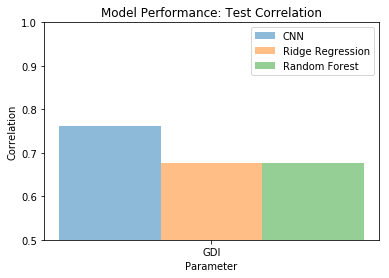

In [23]:
# Setting the positions and width for the bars
results_df_test = results_df[results_df['dataset'] == 'test'].copy().sort_values(by=['model','idx'])
pos = list(range(1))
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots()

print(pos)
print(results_df_test[results_df_test['model'] == 'cnn']['correlation'])

plt.bar(pos, results_df_test[results_df_test['model'] == 'cnn']['correlation'], 
        width, 
        alpha=0.5, label='CNN');

plt.bar([p + width for p in pos], results_df_test[results_df_test['model'] == 'rr']['correlation'], 
        width, 
        alpha=0.5, label='Ridge Regression');

plt.bar([p + 2*width for p in pos], results_df_test[results_df_test['model'] == 'rf']['correlation'], 
        width, 
        alpha=0.5, label='Random Forest');

ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(results_df_test['target']);
plt.xlabel("Parameter")
plt.ylabel("Correlation")
plt.legend()
plt.ylim([0.5,1]);
plt.title("Model Performance: Test Correlation")
plt.savefig("figures/corr_performance.png",dpi=600)

In [24]:
results_df_test

,model,target,dataset,correlation,rmse,idx
2,cnn,GDI,test,0.762354,7.891947,0
8,rf,GDI,test,0.676394,8.638938,0
5,rr,GDI,test,0.676394,8.638938,0
